In [28]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [29]:
#マスーばねーダンパシステムの定義
M = 1.0
D = 5.0
K = 6.0
A = np.array([[0.0, 1.0], [-K/M,-D/M]]) #行列A
b = np.array([[0.0], [1/M]]) #ベクトルb
c = np.array([[1.0, 0.0]]) #ベクトルc
d = 0 #スカラーd

In [30]:
poles = [-3.0, -3.0] #閉ループシステムの極の指定
f = matlab.acker(A, b, poles) #フィードバックゲインを求める
print("feedback gain =", f) #フィードバックゲインの表示

feedback gain = [[ 3.  1.]]


In [31]:
Af = A - b*f #Af = A-bfの計算
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

sys_s_fbk = matlab.ss(Af, b, cp, dp) #フィードバック系の状態空間表現を求める
(y_s_fbk, t_s_fbk) = matlab.initial(sys_s_fbk, X0 = np.array([[-1.0],[0.0]]), T = arange(0, 5, 0.01)) #フィードバック系の初期値応答を求める

In [32]:
#積分ゲインをg=0とした場合
#(13.36)式の拡大系を構成する
g0 = 0
E01 = np.concatenate((Af, b*g0), axis=1)
E02 = np.concatenate((-c, np.array([[0.0]])), axis=1)
E0 = np.concatenate((E01, E02), axis=0)
bp = np.concatenate((np.array([[0.0], [-1/M]]), np.array([[1.0]])), axis=0)
cp = np.eye(3)#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

servo_sys0 = matlab.ss(E0, bp, cp, dp) #(13.36)式の状態空間表現を求める
(y_servo_0, t_servo_0) = matlab.step(servo_sys0, X0 = np.array([[-1.0],[0.0],[0.0]]), T = arange(0, 10, 0.01)) #(13.36)式のステップ応答を求める

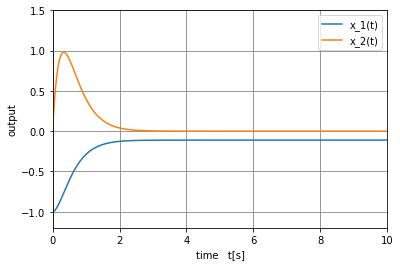

In [33]:
# 図13.9の描画
plt.plot(t_servo_0, y_servo_0[:,0], label = "x_1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_servo_0, y_servo_0[:,1], label = "x_2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 1.5]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

In [34]:
#積分ゲインをg=1とした場合
#(13.36)式の拡大系を構成する
g1 = 1.0
E11 = np.concatenate((Af, b*g1), axis=1)
E12 = np.concatenate((-c, np.array([[0.0]])), axis=1)
E1 = np.concatenate((E11, E12), axis=0)
bp = np.concatenate((np.array([[0.0], [-1/M]]), np.array([[1.0]])), axis=0)
cp = np.eye(3)#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

servo_sys1 = matlab.ss(E1, bp, cp, dp) #(13.36)式の状態空間表現を求める
(y_servo_1, t_servo_1) = matlab.initial(servo_sys1, X0 = np.array([[-1.0],[0.0],[0.0]]), T = arange(0, 10, 0.01)) #(13.36)式のステップ応答を求める

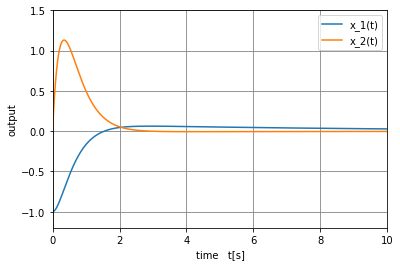

In [35]:
# 図13.10の描画
plt.plot(t_servo_1, y_servo_1[:,0], label = "x_1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_servo_1, y_servo_1[:,1], label = "x_2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 1.5]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

In [36]:
#積分ゲインをg=5とした場合
#(13.36)式の拡大系を構成する
g2 = 5.0
E21 = np.concatenate((Af, b*g2), axis=1)
E22 = np.concatenate((-c, np.array([[0.0]])), axis=1)
E2 = np.concatenate((E21, E22), axis=0)
bp = np.concatenate((np.array([[0.0], [-1/M]]), np.array([[1.0]])), axis=0)
cp = np.eye(3)#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

servo_sys2 = matlab.ss(E2, bp, cp, dp) #(13.36)式の状態空間表現を求める
(y_servo_2, t_servo_2) = matlab.initial(servo_sys2, X0 = np.array([[-1.0],[0.0],[0.0]]), T = arange(0, 10, 0.01)) #(13.36)式のステップ応答を求める

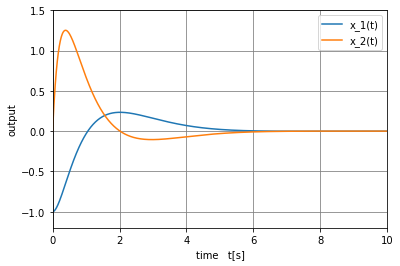

In [37]:
# 図13.11の描画
plt.plot(t_servo_2, y_servo_2[:,0], label = "x_1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_servo_2, y_servo_2[:,1], label = "x_2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 1.5]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

In [38]:
#積分ゲインをg=1．3とした場合
#(13.36)式の拡大系を構成する
g3 = 1.3
E31 = np.concatenate((Af, b*g3), axis=1)
E32 = np.concatenate((-c, np.array([[0.0]])), axis=1)
E3 = np.concatenate((E31, E32), axis=0)
bp = np.concatenate((np.array([[0.0], [-1/M]]), np.array([[1.0]])), axis=0)
cp = np.eye(3)#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

servo_sys3 = matlab.ss(E3, bp, cp, dp) #(13.36)式の状態空間表現を求める
(y_servo_3, t_servo_3) = matlab.initial(servo_sys3, X0 = np.array([[-1.0],[0.0],[0.0]]), T = arange(0, 10, 0.01)) #(13.36)式のステップ応答を求める

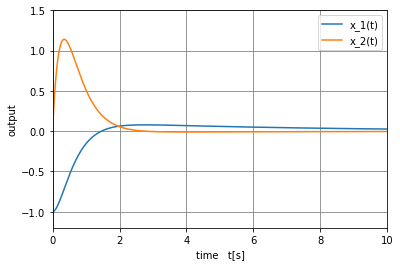

In [39]:
# 図13.12の描画
plt.plot(t_servo_3, y_servo_3[:,0], label = "x_1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_servo_3, y_servo_3[:,1], label = "x_2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 1.5]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示